In [1]:
import tensorflow as tf
import keras as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Inicializando a Rede Neural Convolucional

In [2]:
# Criando a rede
classifier = Sequential()

# Passo 1 - Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Passo 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Duplicação das camadas
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Passo 3 - Flattening
classifier.add(Flatten())

# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Pré-Processamento

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Criando os objetos train_datagen e validation_datagen com as regras de pré-processamento das imagens
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

# Pré-processamento das imagens de treino e validação
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('test_set',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'binary')

Found 196 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


# Treinamento

In [4]:
# Executando o treinamento
classifier.fit(training_set,
               steps_per_epoch=7,
               epochs=5,
               validation_data=validation_set,
               validation_steps=3)

Epoch 1/5
7/7 [==============================] - 1s 97ms/step - loss: 0.7408 - accuracy: 0.5816 - val_loss: 0.6738 - val_accuracy: 0.5753
Epoch 2/5
7/7 [==============================] - 1s 79ms/step - loss: 0.6477 - accuracy: 0.6020 - val_loss: 0.6385 - val_accuracy: 0.5753
Epoch 3/5
7/7 [==============================] - 1s 82ms/step - loss: 0.6066 - accuracy: 0.6071 - val_loss: 0.5810 - val_accuracy: 0.5890
Epoch 4/5
7/7 [==============================] - 1s 73ms/step - loss: 0.5512 - accuracy: 0.6990 - val_loss: 0.4799 - val_accuracy: 0.7808
Epoch 5/5
7/7 [==============================] - 1s 76ms/step - loss: 0.5000 - accuracy: 0.7347 - val_loss: 0.3853 - val_accuracy: 0.8219


# Automatizando o processo de predição

In [5]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_and_show_image(image_path, classifier, target_size=(64, 64)):
    # Carregar e processar a imagem para o modelo
    test_image = image.load_img(image_path, target_size=target_size)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Fazer a predição usando o modelo
    result = classifier.predict(test_image)

    # Determinar a predição
    if result[0][0] == 1:
        prediction = 'Homer'
    else:
        prediction = 'Bart'

    # Exibir a imagem e a predição
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Desativa os eixos
    plt.title(f"Prediction: {prediction}")
    plt.show()



# Predizendo imagens do Bart

1/1 [==============================] - 0s 120ms/step


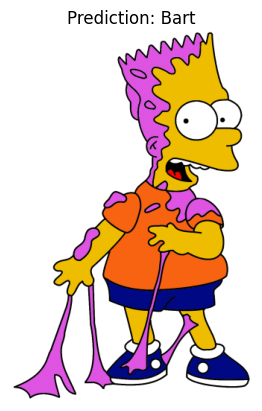

1/1 [==============================] - 0s 18ms/step


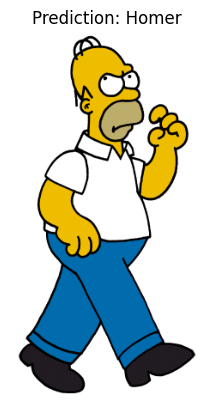

In [6]:
predict_and_show_image('test_set\\bart\\bart1.bmp', classifier)
predict_and_show_image('test_set\\homer\\homer20.bmp', classifier)

# Teste com novos hiper-parametros

### Retirando a camada duplicada de Convolucao e Pooling

In [7]:
# Criando a rede
c2 = Sequential()
# Passo 1 - Primeira Camada de Convolução
c2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Passo 2 - Pooling
c2.add(MaxPooling2D(pool_size = (2, 2)))
# Passo 3 - Flattening
c2.add(Flatten())
# Passo 4 - Full connection
c2.add(Dense(units = 128, activation = 'relu'))
c2.add(Dense(units = 1, activation = 'sigmoid'))
# Compilando a rede
c2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Compilando
c2.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Executando o treinamento
c2.fit(training_set, steps_per_epoch=7, epochs=5,
               validation_data=validation_set, validation_steps=3)

Epoch 1/5
7/7 [==============================] - 1s 106ms/step - loss: 2.7321 - accuracy: 0.5561 - val_loss: 1.3111 - val_accuracy: 0.4247
Epoch 2/5
7/7 [==============================] - 1s 83ms/step - loss: 1.0027 - accuracy: 0.4949 - val_loss: 0.7107 - val_accuracy: 0.5753
Epoch 3/5
7/7 [==============================] - 1s 84ms/step - loss: 0.6474 - accuracy: 0.6122 - val_loss: 0.5548 - val_accuracy: 0.7808
Epoch 4/5
7/7 [==============================] - 1s 84ms/step - loss: 0.5933 - accuracy: 0.7449 - val_loss: 0.5129 - val_accuracy: 0.7671
Epoch 5/5
7/7 [==============================] - 1s 90ms/step - loss: 0.5338 - accuracy: 0.7347 - val_loss: 0.4938 - val_accuracy: 0.7534


### Aumentando para 3 camadas de Convolucao e Pooling

In [8]:
# Criando a rede
c3 = Sequential()
# Passo 1 - Primeira Camada de Convolução
c3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Passo 2 - Pooling
c3.add(MaxPooling2D(pool_size = (2, 2)))
# Duplicação das camadas
c3.add(Conv2D(32, (3, 3), activation = 'relu'))
c3.add(MaxPooling2D(pool_size = (2, 2)))
# Duplicação das camadas
c3.add(Conv2D(32, (3, 3), activation = 'relu'))
c3.add(MaxPooling2D(pool_size = (2, 2)))
# Passo 3 - Flattening
c3.add(Flatten())
# Passo 4 - Full connection
c3.add(Dense(units = 128, activation = 'relu'))
c3.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
c3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Executando o treinamento
c3.fit(training_set, steps_per_epoch=7, epochs=5,
               validation_data=validation_set, validation_steps=3)

Epoch 1/5
7/7 [==============================] - 1s 91ms/step - loss: 0.6827 - accuracy: 0.5510 - val_loss: 0.6743 - val_accuracy: 0.7123
Epoch 2/5
7/7 [==============================] - 0s 79ms/step - loss: 0.6533 - accuracy: 0.6276 - val_loss: 0.6459 - val_accuracy: 0.5753
Epoch 3/5
7/7 [==============================] - 1s 82ms/step - loss: 0.6230 - accuracy: 0.6122 - val_loss: 0.5794 - val_accuracy: 0.6575
Epoch 4/5
7/7 [==============================] - 0s 67ms/step - loss: 0.5880 - accuracy: 0.7245 - val_loss: 0.5266 - val_accuracy: 0.8219
Epoch 5/5
7/7 [==============================] - 1s 73ms/step - loss: 0.5398 - accuracy: 0.7602 - val_loss: 0.4547 - val_accuracy: 0.8082


### Mudando o numero de kernels

In [9]:
# Criando a rede
c4 = Sequential()
# Passo 1 - Primeira Camada de Convolução
c4.add(Conv2D(64, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))  # Alterado para 64 kernels
# Passo 2 - Pooling
c4.add(MaxPooling2D(pool_size = (2, 2)))
# Duplicação das camadas
c4.add(Conv2D(64, (3, 3), activation = 'relu'))  # Alterado para 128 kernels
c4.add(MaxPooling2D(pool_size = (2, 2)))
# Passo 3 - Flattening
c4.add(Flatten())
# Passo 4 - Full connection
c4.add(Dense(units = 128, activation = 'relu'))
c4.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
c4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Executando o treinamento
c4.fit(training_set, steps_per_epoch=7, epochs=5,
       validation_data=validation_set, validation_steps=3)


Epoch 1/5
7/7 [==============================] - 2s 127ms/step - loss: 0.7504 - accuracy: 0.5204 - val_loss: 0.6843 - val_accuracy: 0.5753
Epoch 2/5
7/7 [==============================] - 1s 100ms/step - loss: 0.6769 - accuracy: 0.6020 - val_loss: 0.6648 - val_accuracy: 0.5753
Epoch 3/5
7/7 [==============================] - 1s 115ms/step - loss: 0.6465 - accuracy: 0.6020 - val_loss: 0.6257 - val_accuracy: 0.5753
Epoch 4/5
7/7 [==============================] - 1s 99ms/step - loss: 0.6011 - accuracy: 0.6122 - val_loss: 0.5602 - val_accuracy: 0.7123
Epoch 5/5
7/7 [==============================] - 1s 101ms/step - loss: 0.5503 - accuracy: 0.7449 - val_loss: 0.5048 - val_accuracy: 0.6575


### Mudando o tamanho dos kernels para 5, 5

In [10]:
# Criando a rede
c5 = Sequential()
# Passo 1 - Primeira Camada de Convolução
c5.add(Conv2D(32, (5, 5), input_shape = (64, 64, 3), activation = 'relu'))  # Tamanho do kernel alterado para (5, 5)
# Passo 2 - Pooling
c5.add(MaxPooling2D(pool_size = (2, 2)))
# Duplicação das camadas
c5.add(Conv2D(32, (5, 5), activation = 'relu'))  # Tamanho do kernel alterado para (5, 5)
c5.add(MaxPooling2D(pool_size = (2, 2)))
# Passo 3 - Flattening
c5.add(Flatten())
# Passo 4 - Full connection
c5.add(Dense(units = 128, activation = 'relu'))
c5.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
c5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Executando o treinamento
c5.fit(training_set, steps_per_epoch=7, epochs=5,
       validation_data=validation_set, validation_steps=3)


Epoch 1/5
7/7 [==============================] - 1s 103ms/step - loss: 0.7776 - accuracy: 0.5408 - val_loss: 0.6643 - val_accuracy: 0.5753
Epoch 2/5
7/7 [==============================] - 1s 94ms/step - loss: 0.6507 - accuracy: 0.6020 - val_loss: 0.6336 - val_accuracy: 0.5890
Epoch 3/5
7/7 [==============================] - 1s 97ms/step - loss: 0.6636 - accuracy: 0.6224 - val_loss: 0.5520 - val_accuracy: 0.7945
Epoch 4/5
7/7 [==============================] - 1s 82ms/step - loss: 0.5838 - accuracy: 0.6888 - val_loss: 0.5541 - val_accuracy: 0.7397
Epoch 5/5
7/7 [==============================] - 1s 84ms/step - loss: 0.5878 - accuracy: 0.7500 - val_loss: 0.5808 - val_accuracy: 0.6712


### Aumentando o tamanho da camada densa

In [11]:
# Criando a rede
c6 = Sequential()
# Passo 1 - Primeira Camada de Convolução
c6.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Passo 2 - Pooling
c6.add(MaxPooling2D(pool_size = (2, 2)))
# Duplicação das camadas
c6.add(Conv2D(32, (3, 3), activation = 'relu'))
c6.add(MaxPooling2D(pool_size = (2, 2)))
# Passo 3 - Flattening
c6.add(Flatten())
# Passo 4 - Full connection
c6.add(Dense(units = 256, activation = 'relu'))  # Número de unidades alterado para 256
c6.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
c6.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Executando o treinamento
c6.fit(training_set, steps_per_epoch=7, epochs=5,
       validation_data=validation_set, validation_steps=3)


Epoch 1/5
7/7 [==============================] - 1s 99ms/step - loss: 0.8942 - accuracy: 0.5510 - val_loss: 0.6429 - val_accuracy: 0.7808
Epoch 2/5
7/7 [==============================] - 1s 76ms/step - loss: 0.6723 - accuracy: 0.6071 - val_loss: 0.6037 - val_accuracy: 0.7397
Epoch 3/5
7/7 [==============================] - 1s 88ms/step - loss: 0.6555 - accuracy: 0.5867 - val_loss: 0.5634 - val_accuracy: 0.7260
Epoch 4/5
7/7 [==============================] - 1s 76ms/step - loss: 0.5635 - accuracy: 0.7347 - val_loss: 0.4561 - val_accuracy: 0.7945
Epoch 5/5
7/7 [==============================] - 1s 76ms/step - loss: 0.5245 - accuracy: 0.7194 - val_loss: 0.6121 - val_accuracy: 0.7397


### Mudando a funcao de ativacao para tahn

In [12]:
# Criando a rede
c7 = Sequential()
# Passo 1 - Primeira Camada de Convolução
c7.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'tanh'))  # Função de ativação alterada para 'tanh'
# Passo 2 - Pooling
c7.add(MaxPooling2D(pool_size = (2, 2)))
# Duplicação das camadas
c7.add(Conv2D(32, (3, 3), activation = 'tanh'))  # Função de ativação alterada para 'tanh'
c7.add(MaxPooling2D(pool_size = (2, 2)))
# Passo 3 - Flattening
c7.add(Flatten())
# Passo 4 - Full connection
c7.add(Dense(units = 128, activation = 'tanh'))  # Função de ativação alterada para 'tanh'
c7.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
c7.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Executando o treinamento
c7.fit(training_set, steps_per_epoch=7, epochs=5,
       validation_data=validation_set, validation_steps=3)


Epoch 1/5
7/7 [==============================] - 1s 106ms/step - loss: 1.2939 - accuracy: 0.5510 - val_loss: 0.6998 - val_accuracy: 0.6575
Epoch 2/5
7/7 [==============================] - 1s 72ms/step - loss: 0.6749 - accuracy: 0.7143 - val_loss: 0.4148 - val_accuracy: 0.8219
Epoch 3/5
7/7 [==============================] - 1s 73ms/step - loss: 0.5229 - accuracy: 0.7755 - val_loss: 0.4801 - val_accuracy: 0.7397
Epoch 4/5
7/7 [==============================] - 1s 82ms/step - loss: 0.4666 - accuracy: 0.7857 - val_loss: 0.3531 - val_accuracy: 0.8493
Epoch 5/5
7/7 [==============================] - 1s 71ms/step - loss: 0.4745 - accuracy: 0.7704 - val_loss: 0.3334 - val_accuracy: 0.8493
